Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 9.91M/9.91M [00:02<00:00, 4.69MB/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 28.9k/28.9k [00:00<00:00, 493kB/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 1.65M/1.65M [00:00<00:00, 4.50MB/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 4.54k/4.54k [00:00<00:00, 7.56MB/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw

Epoch [1/5], Training Loss: 0.1207
Epoch [1/5], Test Loss: 0.0406, Accuracy: 98.74%
Epoch [2/5], Training Loss: 0.0379
Epoch [2/5], Test Loss: 0.0390, Accuracy: 98.78%
Epoch [3/5], Training Loss: 0.0215
Epoch [3/5], Test Loss: 0.0295, Accuracy: 99.01%
Epoch [4/5], Training Loss: 0.0164
Epoch [4/5], Test Loss: 0.0378, Accuracy: 98.83%
Epoch [5/5], Training Loss: 0.0133
Epoch [5/5], Test Loss: 0.0392, Accuracy: 98.87%


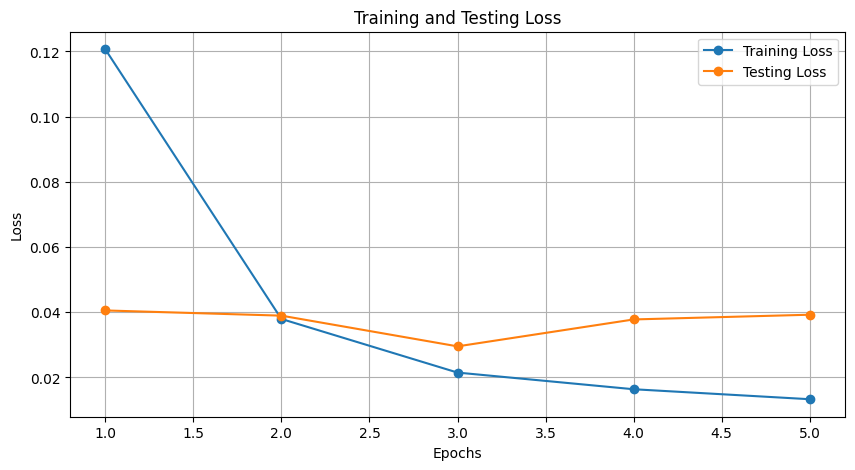

NameError: name 'np' is not defined

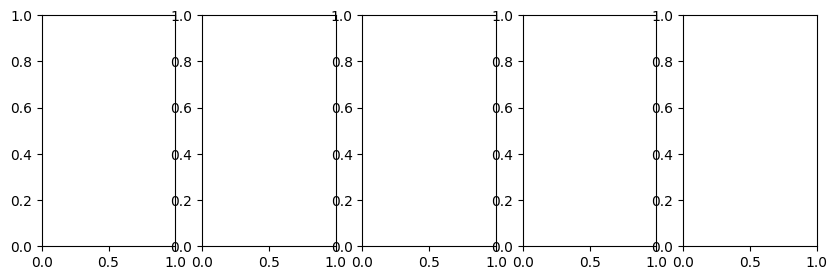

In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)  # Output: 32x28x28
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1) # Output: 64x28x28
        self.pool = nn.MaxPool2d(2, 2)  # Output after pool: 64x14x14
        self.fc1 = nn.Linear(64 * 14 * 14, 128)  # Fully connected layer
        self.fc2 = nn.Linear(128, 10)  # Output layer for 10 classes

    def forward(self, x):
        x = torch.relu(self.conv1(x))
        x = torch.relu(self.conv2(x))
        x = self.pool(x)
        x = x.view(-1, 64 * 14 * 14)  # Flatten
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)  # Output logits
        return x

transform = transforms.Compose([
    transforms.ToTensor(),  # Convert images to tensors
    transforms.Normalize((0.1307,), (0.3081,))  # Normalize the data
])

train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = datasets.MNIST(root='./data', train=False, transform=transform, download=True)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)


model = CNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

epochs = 5
train_losses = []
test_losses = []

for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    for images, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    train_loss = running_loss / len(train_loader)
    train_losses.append(train_loss)
    print(f'Epoch [{epoch+1}/{epochs}], Training Loss: {train_loss:.4f}')

    model.eval()
    test_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in test_loader:
            outputs = model(images)
            loss = criterion(outputs, labels)
            test_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    test_loss = test_loss / len(test_loader)
    test_losses.append(test_loss)
    accuracy = 100 * correct / total
    print(f'Epoch [{epoch+1}/{epochs}], Test Loss: {test_loss:.4f}, Accuracy: {accuracy:.2f}%')

plt.figure(figsize=(10,5))
plt.plot(range(1, epochs + 1), train_losses, label='Training Loss', marker='o')
plt.plot(range(1, epochs + 1), test_losses, label='Testing Loss', marker='o')
plt.title('Training and Testing Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()




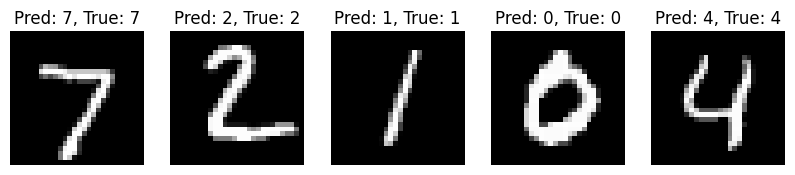

In [4]:
import numpy as np
def show_sample_predictions(images, labels, predictions, num_samples=5):
    images = images[:num_samples]
    labels = labels[:num_samples]
    predictions = predictions[:num_samples]

    images = images.numpy()

    fig, axes = plt.subplots(1, num_samples, figsize=(10, 3))
    for i in range(num_samples):
        axes[i].imshow(np.squeeze(images[i]), cmap='gray')
        axes[i].set_title(f'Pred: {predictions[i]}, True: {labels[i]}')
        axes[i].axis('off')
    plt.show()

model.eval()
with torch.no_grad():
    data_iter = iter(test_loader)
    images, labels = next(data_iter)
    outputs = model(images)
    _, predicted = torch.max(outputs, 1)

    # Show the first few samples with predictions
    show_sample_predictions(images, labels, predicted, num_samples=5)
